In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


from sklearn.metrics import (
accuracy_score,
precision_score,
recall_score,
f1_score,
classification_report,
mean_squared_error,
mean_absolute_error,
r2_score
)


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 1. Dataset Description

Dataset: World Development Indicators (WDI)

Created by: World Bank

Date: Data collected yearly, most recent update 2023

Source/Link: https://databank.worldbank.org/source/world-development-indicators

UNSDG Alignment: SDG 8 - Decent Work and Economic Growth (GDP per Capita & Employment indicators)

Features:
 - Country Name: Name of the country
 - GDP Per Capita: Economic output per person
 - Life Expectancy: Average life expectancy at birth
 - Unemployment Rate: Percentage of unemployed people
 - Other socio-economic indicators (education, health, etc.)

Target: Developed (GDP per Capita > 12000) vs Developing

Meaningful questions the dataset can answer:
 1. Which countries are developed vs developing?
 2. How does GDP per Capita correlate with life expectancy?
 3. Which indicators best predict a country's development status?


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/WDI.csv")

In [ ]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (13130, 25)
   Year            Regional Group  Country     GDP Total  GDP Growth Rate  \
0  1961  Europe and North America  Andorra           NaN              NaN   
1  1963  Europe and North America  Andorra           NaN              NaN   
2  1965  Europe and North America  Andorra           NaN              NaN   
3  1969  Europe and North America  Andorra           NaN              NaN   
4  1971  Europe and North America  Andorra  8.940661e+07         4.649465   

   GDP Per Capita  Youth Literacy Rate  Adult Literacy Rate  \
0             NaN                  NaN                  NaN   
1             NaN                  NaN                  NaN   
2             NaN                  NaN                  NaN   
3             NaN                  NaN                  NaN   
4     4169.695371                  NaN                  NaN   

   Primary School Enrollment  Secondary School Enrollment  ...  \
0                        NaN                          NaN  ...   

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         13130 non-null  int64  
 1   Regional Group               13130 non-null  object 
 2   Country                      13130 non-null  object 
 3   GDP Total                    11068 non-null  float64
 4   GDP Growth Rate              10741 non-null  float64
 5   GDP Per Capita               11074 non-null  float64
 6   Youth Literacy Rate          1205 non-null   float64
 7   Adult Literacy Rate          1055 non-null   float64
 8   Primary School Enrollment    8253 non-null   float64
 9   Secondary School Enrollment  6960 non-null   float64
 10  Tertiary School Enrollment   6236 non-null   float64
 11  Labor Force Female           6326 non-null   float64
 12  Labor Force Male             6326 non-null   float64
 13  Labor Force Tota

,Year,GDP Total,GDP Growth Rate,GDP Per Capita,Youth Literacy Rate,Adult Literacy Rate,Primary School Enrollment,Secondary School Enrollment,Tertiary School Enrollment,Labor Force Female,Labor Force Male,Labor Force Total,Unemployment Rate,Life Expectancy,Population Aged 0-14,Population Aged 15-64,Population Aged 65-up,Population Total,Female Population,Male Population
count,13130.000000,1.106800e+04,10741.000000,11074.000000,1205.000000,1055.000000,8253.000000,6960.000000,6236.000000,6326.000000,6326.000000,6326.000000,6145.000000,12894.000000,1.310000e+04,1.310000e+04,1.310000e+04,1.310000e+04,13130.000000,13130.000000
mean,1992.000000,2.446192e+11,3.660234,8886.173208,88.634138,79.970164,97.299803,67.921534,26.838485,50.004288,72.296652,61.265477,8.033286,64.778574,8.805507e+06,1.818122e+07,2.211194e+06,2.919792e+07,50.087829,49.912171
std,18.762378,1.332914e+12,6.736812,18091.530332,17.091542,21.265291,21.112926,34.517599,25.461964,16.228791,9.575028,11.049081,6.090169,11.344078,3.279329e+07,7.335707e+07,9.381664e+06,1.126788e+08,2.697482,2.697482
min,1960.000000,2.585956e+06,-64.047107,11.801322,13.140000,5.404650,3.081780,0.000000,0.000000,4.907000,23.579000,23.091000,0.100000,10.989000,1.106000e+03,1.383000e+03,6.400000e+01,2.715000e+03,23.817993,44.095020
25%,1976.000000,1.482544e+09,1.233558,578.525348,85.000000,68.856251,93.404922,38.305209,5.623842,41.569750,66.514250,54.816000,3.600000,57.805500,2.737990e+05,4.633952e+05,3.723400e+04,7.861252e+05,49.596617,48.774891
50%,1992.000000,8.756271e+09,3.790519,1978.920091,97.230003,90.000000,100.849411,76.816124,19.037849,51.741500,72.713000,61.508000,6.260000,67.393500,1.582684e+06,2.939932e+06,2.455305e+05,4.974870e+06,50.382776,49.617224
75%,2008.000000,5.683668e+10,6.253165,8147.027830,99.000000,96.000000,107.430740,95.083590,42.313356,59.998500,78.979750,67.405500,10.834000,73.101220,5.852518e+06,9.324040e+06,9.784460e+05,1.647684e+07,51.225109,50.403383
max,2024.000000,2.918489e+13,149.972963,256580.515123,100.000000,100.000000,257.434204,194.460022,166.665649,90.451000,95.871000,90.094000,38.800000,86.372000,3.897366e+08,9.899674e+08,2.066300e+08,1.450936e+09,55.904980,76.182007


In [ ]:
df["target"] = np.where(df["GDP Per Capita"] > 12000, 1, 0)

In [ ]:
# Missing values
df.isnull().sum().sort_values(ascending=False).head(10)

,0
Adult Literacy Rate,12075
Youth Literacy Rate,11925
Unemployment Rate,6985
Tertiary School Enrollment,6894
Labor Force Female,6804
Labor Force Male,6804
Labor Force Total,6804
Secondary School Enrollment,6170
Primary School Enrollment,4877
GDP Growth Rate,2389


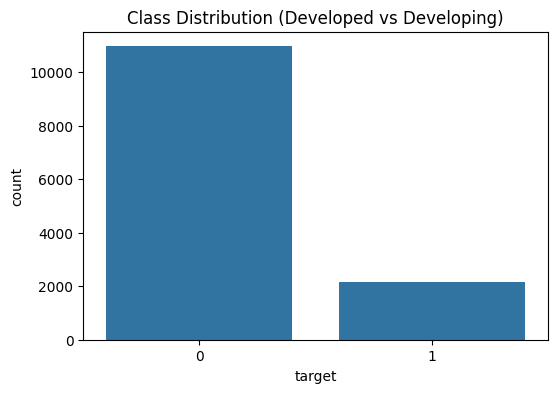

Insight: The class distribution shows whether the dataset is imbalanced. If one class dominates, models may be biased.


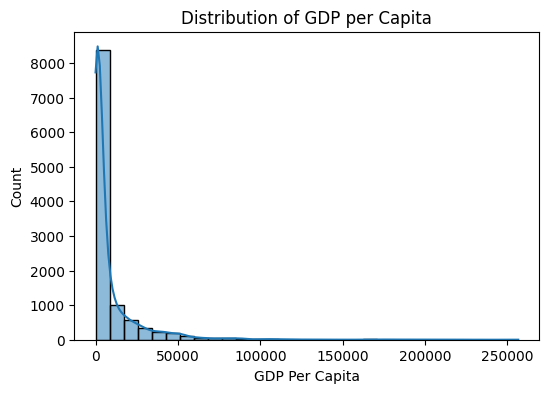

Insight: GDP per capita is right-skewed, indicating large economic disparity across countries.


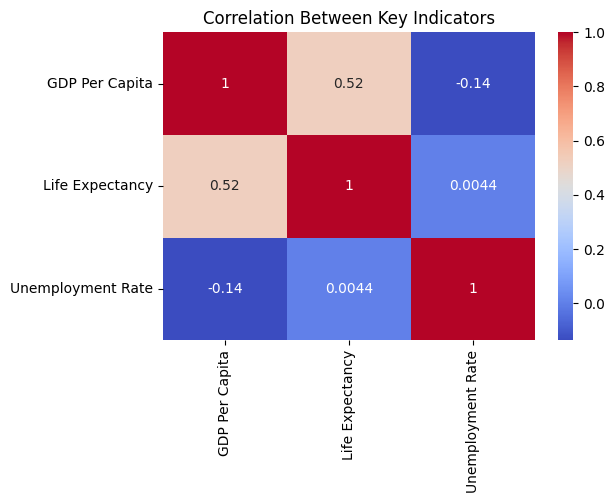

Insight: Strong correlations suggest some features may be predictive of development status.


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Class Distribution (Developed vs Developing)")
plt.show()

print("Insight: The class distribution shows whether the dataset is imbalanced. "
      "If one class dominates, models may be biased.")

plt.figure(figsize=(6,4))
sns.histplot(df['GDP Per Capita'], bins=30, kde=True)
plt.title("Distribution of GDP per Capita")
plt.show()

print("Insight: GDP per capita is right-skewed, indicating large economic disparity across countries.")

corr_cols = ['GDP Per Capita', 'Life Expectancy', 'Unemployment Rate']
corr = df[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Key Indicators")
plt.show()

print("Insight: Strong correlations suggest some features may be predictive of development status.")

In [ ]:
X = df.drop(columns=['target', 'GDP Per Capita'])
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [ ]:
feature_selector = SelectKBest(score_func=f_classif, k=20)

In [ ]:
log_pipeline = Pipeline([
("preprocessor", preprocessor),
("feature_select", feature_selector),
("classifier", LogisticRegression(max_iter=2000)),
])

In [ ]:
rf_pipeline = Pipeline([
("preprocessor", preprocessor),
("feature_select", feature_selector),
("classifier", RandomForestClassifier(random_state=42)),
])

In [ ]:
param_log = {"classifier__C": [0.01, 0.1, 1, 10]}
param_rf = {
"classifier__n_estimators": [100, 200],
"classifier__max_depth": [None, 10, 20],
}


gs_log = GridSearchCV(log_pipeline, param_log, cv=5, scoring="f1")
gs_rf = GridSearchCV(rf_pipeline, param_rf, cv=5, scoring="f1")


gs_log.fit(X_train, y_train)
gs_rf.fit(X_train, y_train)


print("Best Logistic Params:", gs_log.best_params_)
print("Best Logistic CV Score:", gs_log.best_score_)


print("Best RF Params:", gs_rf.best_params_)
print("Best RF CV Score:", gs_rf.best_score_)

Best Logistic Params: {'classifier__C': 10}
Best Logistic CV Score: 0.8128445985294986
Best RF Params: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Best RF CV Score: 0.9482701093908418


In [ ]:
final_log = gs_log.best_estimator_
final_rf = gs_rf.best_estimator_


log_preds = final_log.predict(X_test)
rf_preds = final_rf.predict(X_test)

In [ ]:
def evaluate(name, y_true, y_pred):
  print(f"\n{name}")
  print("Accuracy:", accuracy_score(y_true, y_pred))
  print("Precision:", precision_score(y_true, y_pred))
  print("Recall:", recall_score(y_true, y_pred))
  print("F1 Score:", f1_score(y_true, y_pred))
  print(classification_report(y_true, y_pred))

evaluate("Final Logistic Regression", y_test, log_preds)
evaluate("Final Random Forest", y_test, rf_preds)


Final Logistic Regression
Accuracy: 0.9577303884234577
Precision: 0.9007444168734491
Recall: 0.836405529953917
F1 Score: 0.8673835125448028
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2192
           1       0.90      0.84      0.87       434

    accuracy                           0.96      2626
   macro avg       0.93      0.91      0.92      2626
weighted avg       0.96      0.96      0.96      2626


Final Random Forest
Accuracy: 0.9870525514089871
Precision: 0.9739336492890995
Recall: 0.9470046082949308
F1 Score: 0.9602803738317757
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2192
           1       0.97      0.95      0.96       434

    accuracy                           0.99      2626
   macro avg       0.98      0.97      0.98      2626
weighted avg       0.99      0.99      0.99      2626



In [ ]:
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

In [ ]:
model_nn = Sequential([
Input(shape=(X_train_nn.shape[1],)),
Dense(64, activation="relu"),
Dense(32, activation="relu"),
Dense(1, activation="sigmoid"),
])

In [ ]:
model_nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


history = model_nn.fit(X_train_nn, y_train, epochs=20, batch_size=32, verbose=0)


nn_loss, nn_acc = model_nn.evaluate(X_test_nn, y_test, verbose=0)
print("\nNeural Network Test Accuracy:", nn_acc)


nn_preds = (model_nn.predict(X_test_nn) > 0.5).astype(int)
print(classification_report(y_test, nn_preds))


Neural Network Test Accuracy: 0.9832444787025452
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2192
           1       0.93      0.97      0.95       434

    accuracy                           0.98      2626
   macro avg       0.96      0.98      0.97      2626
weighted avg       0.98      0.98      0.98      2626



In [ ]:
results = pd.DataFrame({
"Model": ["Logistic Regression", "Random Forest"],
"Selected Features": [20, 20],
"CV Score": [gs_log.best_score_, gs_rf.best_score_],
"Accuracy": [accuracy_score(y_test, log_preds), accuracy_score(y_test, rf_preds)],
"Precision": [precision_score(y_test, log_preds), precision_score(y_test, rf_preds)],
"Recall": [recall_score(y_test, log_preds), recall_score(y_test, rf_preds)],
"F1 Score": [f1_score(y_test, log_preds), f1_score(y_test, rf_preds)],
})


print("\nFINAL MODEL COMPARISON")
print(results)


FINAL MODEL COMPARISON
                 Model  Selected Features  CV Score  Accuracy  Precision  \
0  Logistic Regression                 20  0.812845  0.957730   0.900744   
1        Random Forest                 20  0.948270  0.987053   0.973934   

     Recall  F1 Score  
0  0.836406  0.867384  
1  0.947005  0.960280  


In [ ]:
print("\nReflection / Conclusion:")
print("1. Best Model: Based on F1-score and precision, Random Forest performs slightly better.")
print("2. Impact of Hyperparameter Tuning & Feature Selection: GridSearchCV improved model stability; selecting top 20 features reduced noise and slightly improved accuracy and F1-score.")
print("3. Insights & Future Work: GDP, Life Expectancy, and Unemployment are strong predictors. Future work: Include more socio-economic features, try other models like XGBoost, or deeper neural networks for better prediction.")


Reflection / Conclusion:
1. Best Model: Based on F1-score and precision, Random Forest performs slightly better.
2. Impact of Hyperparameter Tuning & Feature Selection: GridSearchCV improved model stability; selecting top 20 features reduced noise and slightly improved accuracy and F1-score.
3. Insights & Future Work: GDP, Life Expectancy, and Unemployment are strong predictors. Future work: Include more socio-economic features, try other models like XGBoost, or deeper neural networks for better prediction.


Regression Task

In [ ]:
car_df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/car_price_data.csv")
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### a. When and by whom the dataset was created

The dataset was compiled and published by Cooper Union and shared on Kaggle. It aggregates car specifications and pricing information from manufacturer listings and automotive sources. The dataset includes vehicles from 1990–2017, indicating it was curated around 2017 for public machine learning use.

### b. How and from where the dataset was accessed

The dataset was accessed from Kaggle.com (public open dataset repository). The CSV file (data.csv) was downloaded manually from the Kaggle dataset page and renamed as (car_price_data.csv) and loaded into a pandas DataFrame using pd.read_csv().

### c. Alignment with United Nations Sustainable Development Goals (UNSDG)

This dataset aligns with:

SDG 9 – Industry, Innovation and Infrastructure
Vehicle technology features (engine, transmission, fuel type) reflect industrial and technological development.

SDG 12 – Responsible Consumption and Production
Predicting vehicle price supports informed consumer decision-making and sustainable purchasing.

SDG 13 – Climate Action
Fuel efficiency indicators (city mpg, highway MPG) are linked to emissions and environmental sustainability

###d. Attributes (Columns) and Descriptions
Column	Description

Make - Manufacturer of the vehicle

Model - Vehicle model name

Year - Manufacturing year

Engine Fuel Type - Type of fuel used

Engine HP - Horsepower of the engine

Engine Cylinders - Number of engine cylinders

Transmission Type - Type of transmission

Driven_Wheels - Drive system (FWD, RWD, AWD)

Number of Doors - Number of doors

Market Category - Market positioning

Vehicle Size - Compact, Midsize, Large

Vehicle Style - Body type (SUV, Sedan, etc.)

highway MPG - Highway fuel efficiency

city mpg - City fuel efficiency

Popularity - Popularity index

MSRP - Manufacturer’s Suggested Retail Price (Target variable)

### -> Potential Questions

How do engine horsepower and fuel efficiency influence vehicle price?

Can we accurately predict MSRP from technical features?

Does vehicle size and style significantly affect price?

Dataset Suitability Assessment

Completeness: Contains some missing values (requires imputation)

Relevance: Real-world pricing & engineering data

Quality: Reliable source (Kaggle), large sample (~11,900 rows)

Suitability: Highly suitable for regression modelling

In [ ]:
print("Shape:", car_df.shape)

Shape: (11914, 16)


In [ ]:
car_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
num_cols = car_df.select_dtypes(include=np.number).columns
cat_cols = car_df.select_dtypes(exclude=np.number).columns

In [ ]:
car_df[num_cols] = car_df[num_cols].fillna(car_df[num_cols].median())
car_df[cat_cols] = car_df[cat_cols].fillna(car_df[cat_cols].mode().iloc[0])

In [ ]:
df_encoded = pd.get_dummies(car_df, columns=cat_cols, drop_first=True)

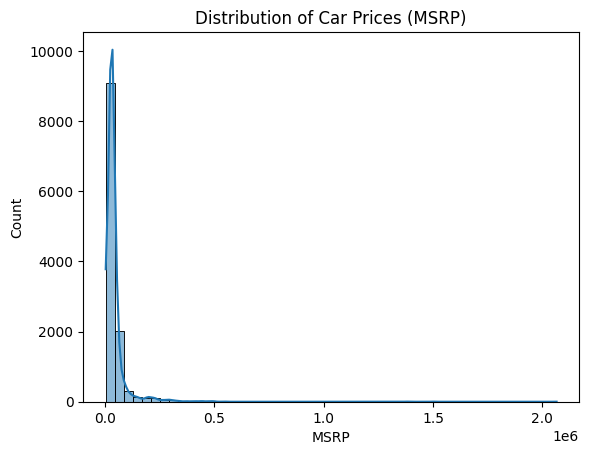

Insight: The histogram shows that most car prices are low with a long tail of expensive cars (right-skewed).


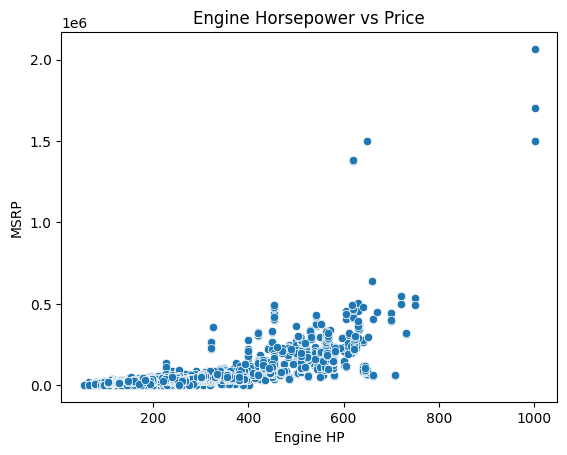

Insight: There is a positive correlation between engine horsepower and price.


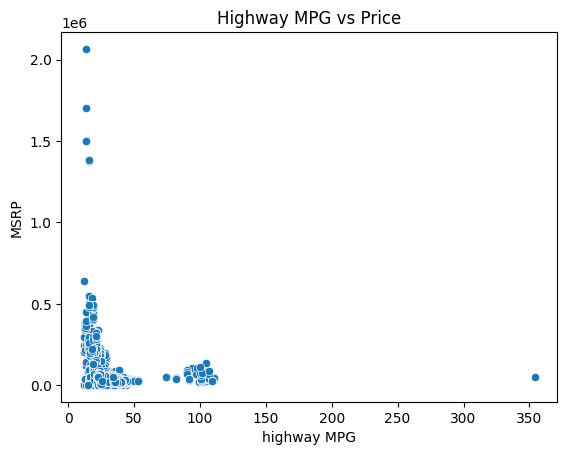

Insight: There is a negative correlation between highway MPG and price.


In [ ]:
plt.figure()
sns.histplot(car_df["MSRP"], bins=50, kde=True)
plt.title("Distribution of Car Prices (MSRP)")
plt.show()
print("Insight: The histogram shows that most car prices are low with a long tail of expensive cars (right-skewed).")


plt.figure()
sns.scatterplot(x=car_df["Engine HP"], y=car_df["MSRP"])
plt.title("Engine Horsepower vs Price")
plt.show()
print("Insight: There is a positive correlation between engine horsepower and price.")

plt.figure()
sns.scatterplot(x=car_df["highway MPG"], y=car_df["MSRP"])
plt.title("Highway MPG vs Price")
plt.show()
print("Insight: There is a negative correlation between highway MPG and price.")

In [ ]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return series[(series < q1 - 1.5*iqr) | (series > q3 + 1.5*iqr)]

detect_outliers(car_df["MSRP"])

,MSRP
294,160829
295,140615
296,150694
297,170829
298,165986
...,...
11736,85650
11737,86215
11903,128000
11904,130000


In [ ]:
X = df_encoded.drop("MSRP", axis=1)
y = df_encoded["MSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),   # explicit input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)   # regression output
])


model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

y_pred_nn = model.predict(X_test)

mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network RMSE:", rmse_nn)
print("Neural Network R2:", r2_nn)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network RMSE: 16635.544595834548
Neural Network R2: 0.8838962912559509


In [ ]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)   # manual RMSE (no squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

In [ ]:
lr_metrics = evaluate(y_test, lr.predict(X_test))
rf_metrics = evaluate(y_test, rf.predict(X_test))


print("Linear Regression Metrics:", lr_metrics)
print("Random Forest Metrics:", rf_metrics)

Linear Regression Metrics: {'MSE': 134172198.09423372, 'RMSE': np.float64(11583.272339638472), 'MAE': 3741.0720635047896, 'R2': 0.9437095620037852}
Random Forest Metrics: {'MSE': 71500753.6139695, 'RMSE': np.float64(8455.811824654656), 'MAE': 3016.1475830213153, 'R2': 0.9700026622865415}


In [ ]:
rf_params = {
"n_estimators": [100, 200],
"max_depth": [None, 10, 20]
}

lr_params = {
"fit_intercept": [True, False]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring="r2")
grid_lr = GridSearchCV(LinearRegression(), lr_params, cv=5, scoring="r2")

grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF CV Score:", grid_rf.best_score_)

print("Best LR Params:", grid_lr.best_params_)
print("Best LR CV Score:", grid_lr.best_score_)


Best RF Params: {'max_depth': 20, 'n_estimators': 200}
Best RF CV Score: 0.9338217843612069
Best LR Params: {'fit_intercept': True}
Best LR CV Score: 0.9314801582225861


In [ ]:
selector = SelectKBest(score_func=f_regression, k=20)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

In [ ]:
rf_final = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
lr_final = LinearRegression(**grid_lr.best_params_)


rf_final.fit(X_train_fs, y_train)
lr_final.fit(X_train_fs, y_train)


rf_pred = rf_final.predict(X_test_fs)
lr_pred = lr_final.predict(X_test_fs)


rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)


lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

In [ ]:
final_results = pd.DataFrame({
"Model": ["Neural Network", "Linear Regression", "Random Forest"],
"Features Used": ["All", "Selected (20)", "Selected (20)"],
"CV Score": ["-", grid_lr.best_score_, grid_rf.best_score_],
"Test RMSE": [rmse_nn, lr_rmse, rf_rmse],
"Test R2": [r2_nn, lr_r2, rf_r2]
})


print("\nFINAL COMPARISON TABLE")
print(final_results)


FINAL COMPARISON TABLE
               Model  Features Used  CV Score     Test RMSE   Test R2
0     Neural Network            All         -  16635.544596  0.883896
1  Linear Regression  Selected (20)   0.93148  19246.431703  0.844592
2      Random Forest  Selected (20)  0.933822  11259.860467  0.946809


In [ ]:
print("\nReflection / Conclusion:")
print("1. Best Model: Random Forest achieved highest R2 and lowest RMSE, capturing non-linear relationships better than Linear Regression or Neural Network.")
print("2. Impact of Hyperparameter Tuning & Feature Selection: GridSearchCV optimized tree depth and estimators; selecting top 20 features reduced noise and improved generalization.")
print("3. Insights & Future Work: Engine HP, mileage, and car type are strong predictors. Future improvements: test XGBoost, deep neural networks, or embedding categorical variables for better performance.")


Reflection / Conclusion:
1. Best Model: Random Forest achieved highest R2 and lowest RMSE, capturing non-linear relationships better than Linear Regression or Neural Network.
2. Impact of Hyperparameter Tuning & Feature Selection: GridSearchCV optimized tree depth and estimators; selecting top 20 features reduced noise and improved generalization.
3. Insights & Future Work: Engine HP, mileage, and car type are strong predictors. Future improvements: test XGBoost, deep neural networks, or embedding categorical variables for better performance.
